<a href="https://colab.research.google.com/github/fjadidi2001/DataScienceJourney/blob/master/Homework_1_Student_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course </strong></font>

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Homework 1** || **Title**: Introduction to Machine Learning</em></font>


# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



## Importing Libraries


In [ ]:
!pip install scikit-plot

In [ ]:
!pip install scipy==1.7.3

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import cv2



## Load Dataset

In [ ]:
# Dataset Link: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1/data
!kaggle datasets download -d mojtabanafez/rayan-homework1

Dataset URL: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1
License(s): apache-2.0
 96% 63.0M/66.0M [00:02<00:00, 40.4MB/s]
100% 66.0M/66.0M [00:02<00:00, 29.4MB/s]


In [ ]:
!unzip ./rayan-homework1.zip

Archive:  ./rayan-homework1.zip
  inflating: creditcard.csv          


In [ ]:
df = pd.read_csv('./creditcard.csv')
df.head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [ ]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



**Student Task:**
1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features
5. Additional Analysis (Choose at Least 5)
    * Example: Data Visualization (After Dimension Reduction), Outlier Detection, Feature Engineering, Insightful Plots, ...

## Summary Statistics for the Dataset


In [ ]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

## Visualize Distribution of Classes

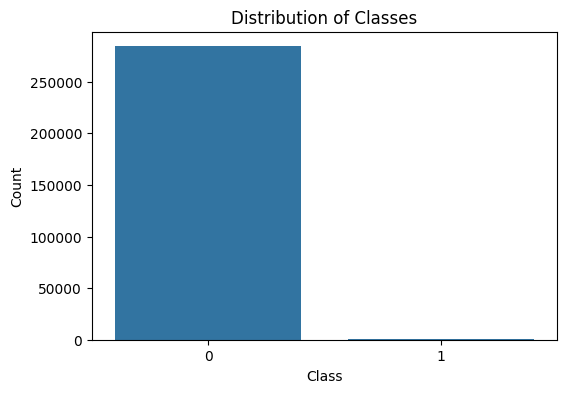

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of classes
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Display the class distribution in percentages

In [ ]:
# Calculate class distribution
class_distribution = df['Class'].value_counts(normalize=True) * 100  # Get percentages

# Display the class distribution in percentage
print(class_distribution)

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


## Compute the correlation matrix

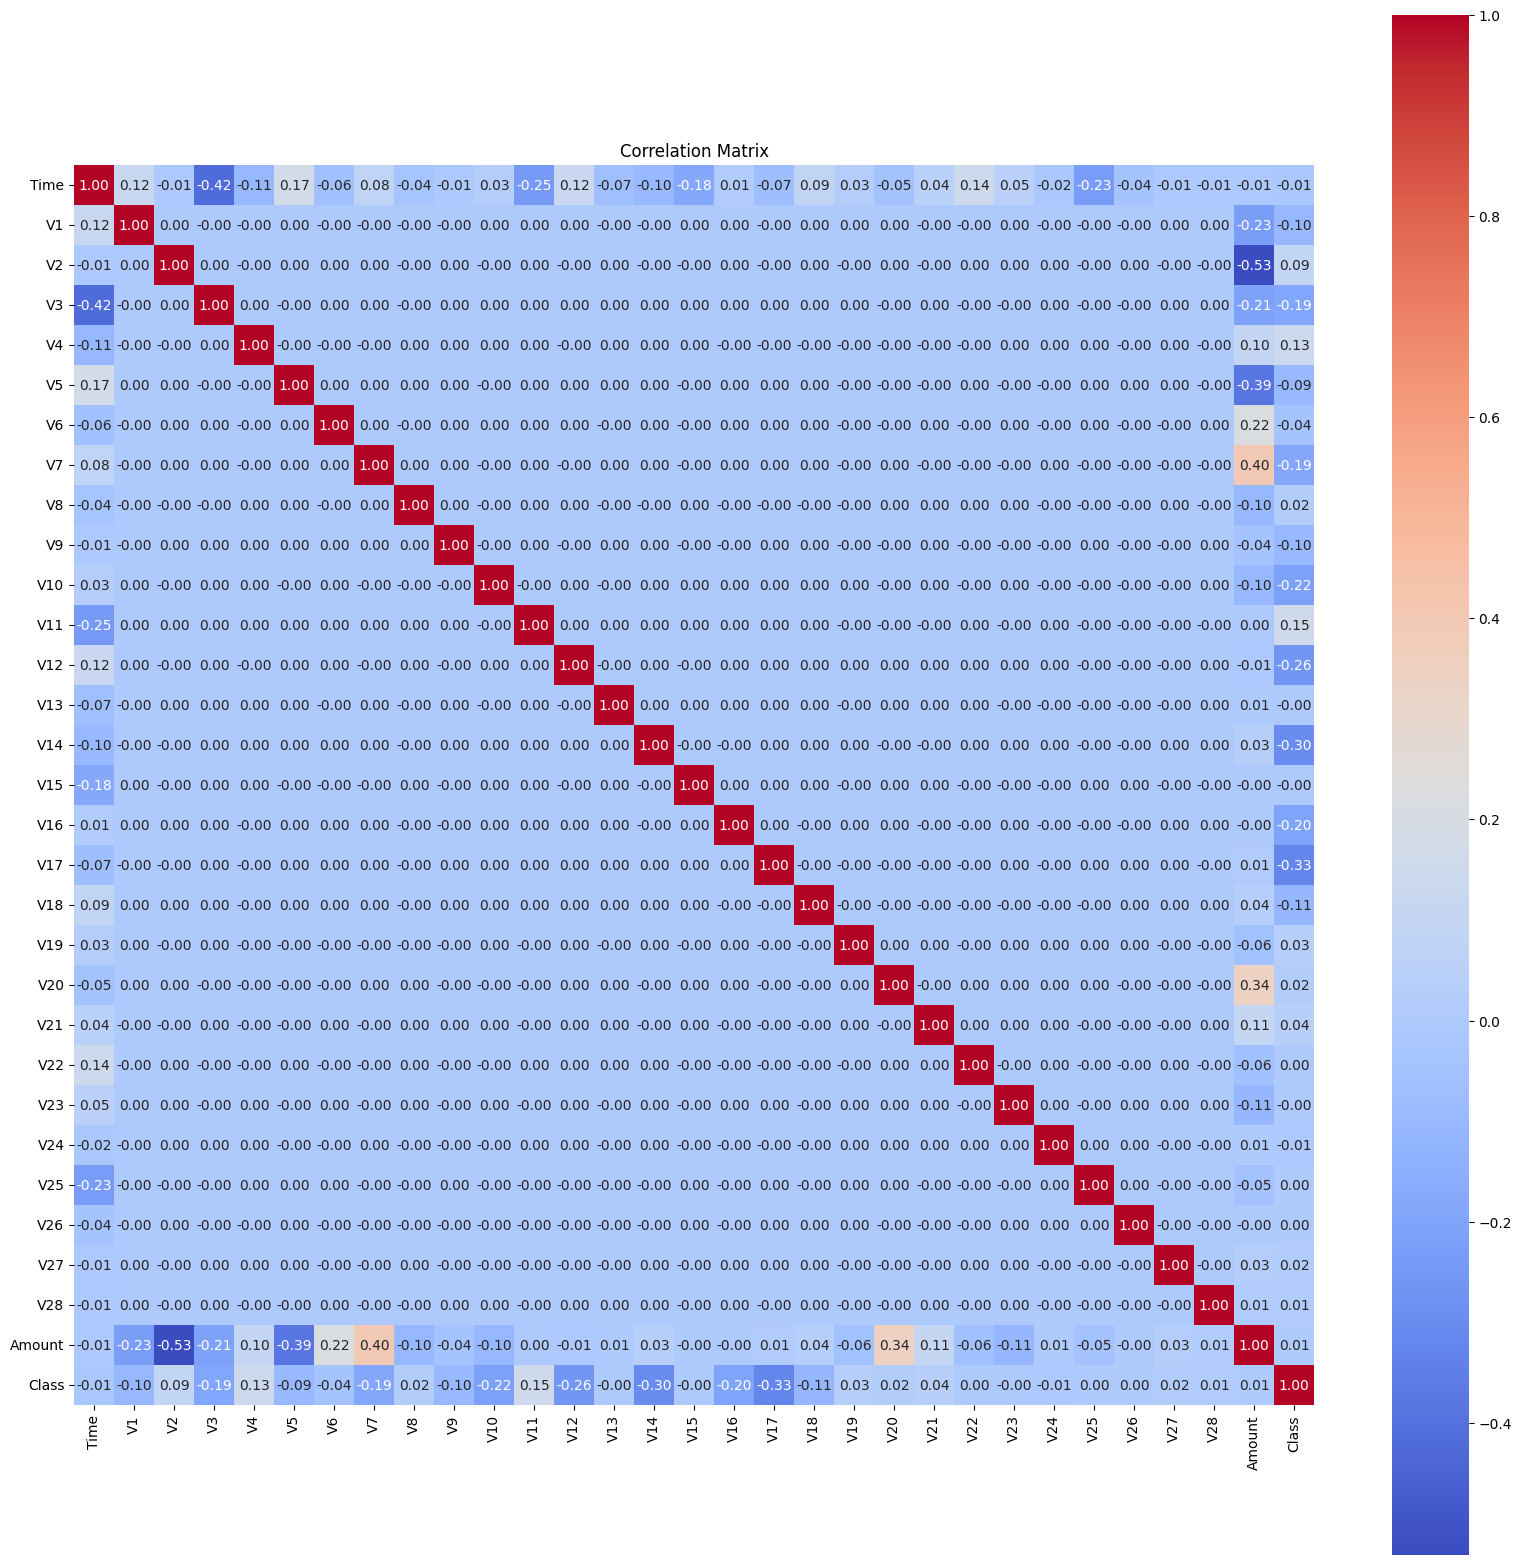

In [ ]:
# Check correlation matrix
plt.figure(figsize=(20, 20))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## Plot the Distribution of Some Selected Features

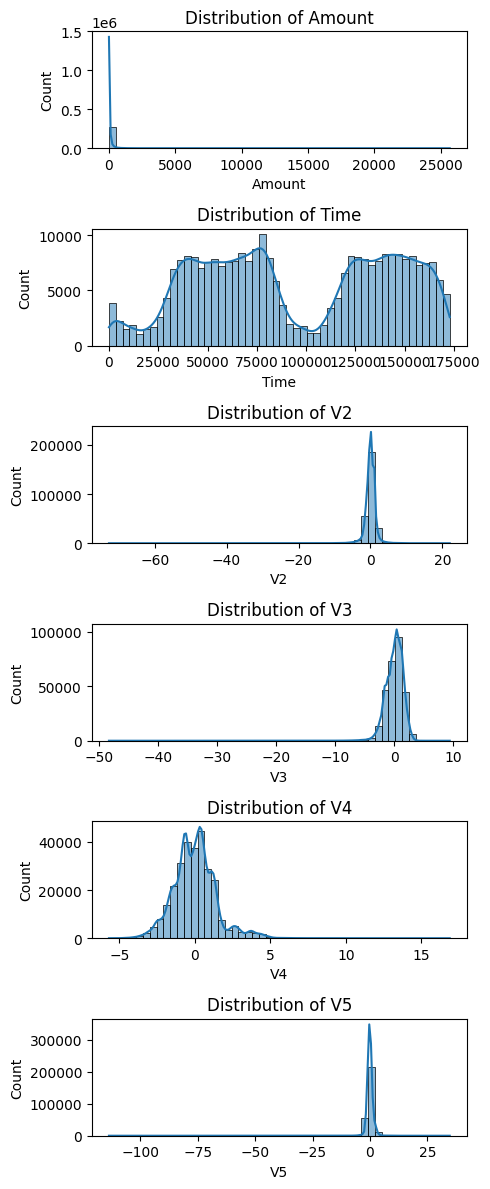

In [ ]:
# List of features to plot
selected_features = ['Amount', 'Time', 'V2', 'V3', 'V4', 'V5']

# Set the figure size with a more balanced width and height
plt.figure(figsize=(5, 12))  # Adjust width to 8 and height to 12 for better proportions
for i, feature in enumerate(selected_features):
    plt.subplot(len(selected_features), 1, i + 1)  # len(selected_features) rows, 1 column
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()
plt.show()

## Additional Analysis

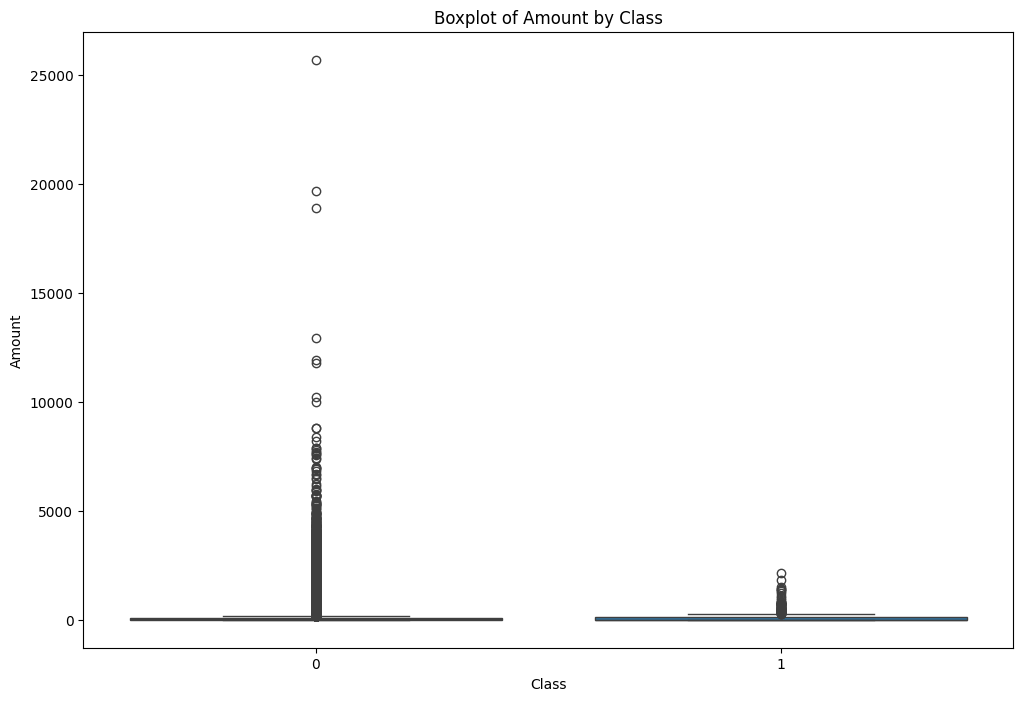

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot of Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

### Outlier Detection

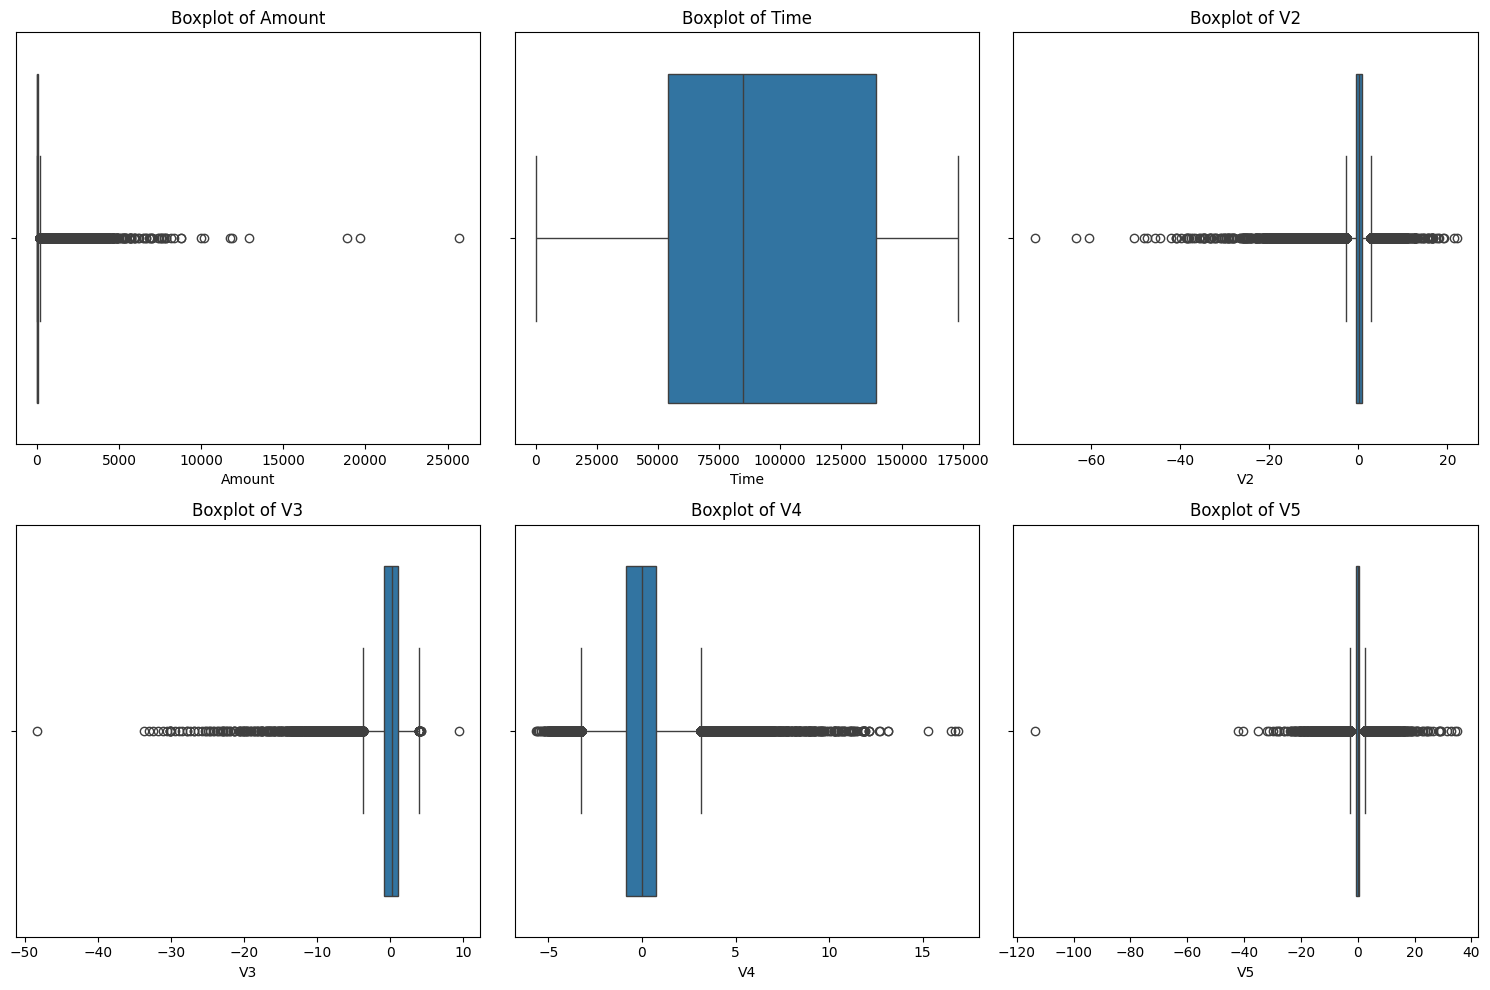

In [ ]:
# Outlier detection using boxplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

### Feature Engineering

In [ ]:
# Feature engineering: Create new features based on existing ones
df['Amount_log'] = np.log1p(df['Amount'])
df['Time_hours'] = df['Time'] / 3600

# Check the new features
df[['Amount', 'Amount_log', 'Time', 'Time_hours']].head()

Amount  Amount_log  Time  Time_hours
0  149.62    5.014760   0.0    0.000000
1    2.69    1.305626   0.0    0.000000
2  378.66    5.939276   1.0    0.000278
3  123.50    4.824306   1.0    0.000278
4   69.99    4.262539   2.0    0.000556

### Insightful Plots


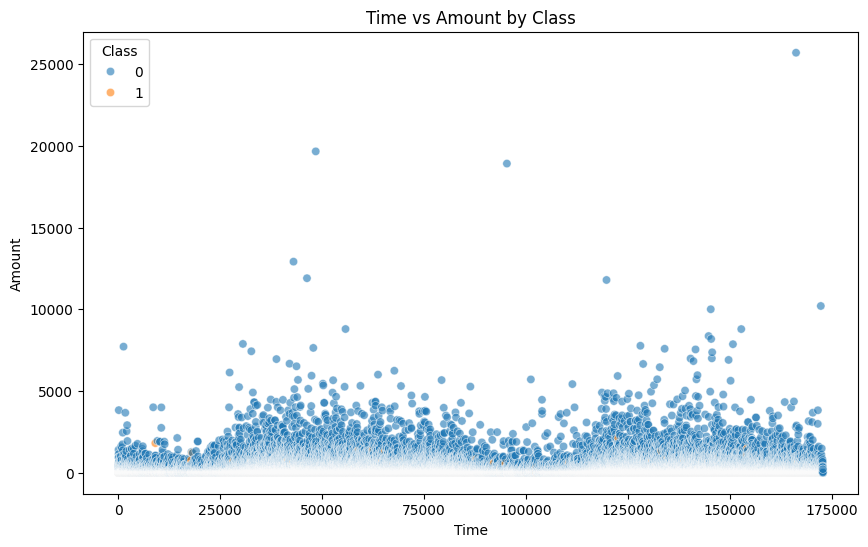

In [ ]:
# Insightful plots: Time vs Amount colored by Class
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df, alpha=0.6)
plt.title('Time vs Amount by Class')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

###  Data Visualization (After Dimension Reduction)

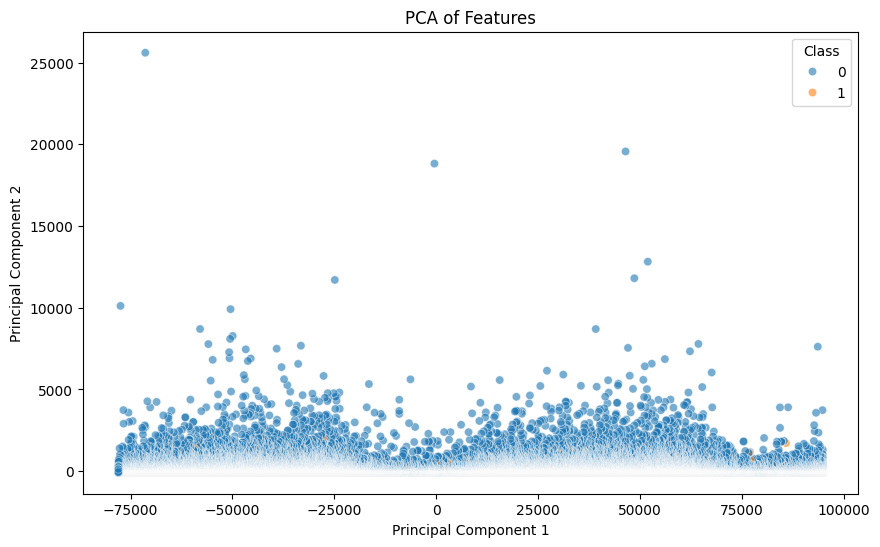

In [ ]:
from sklearn.decomposition import PCA

# PCA for dimension reduction
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, alpha=0.6)
plt.title('PCA of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Pairplot

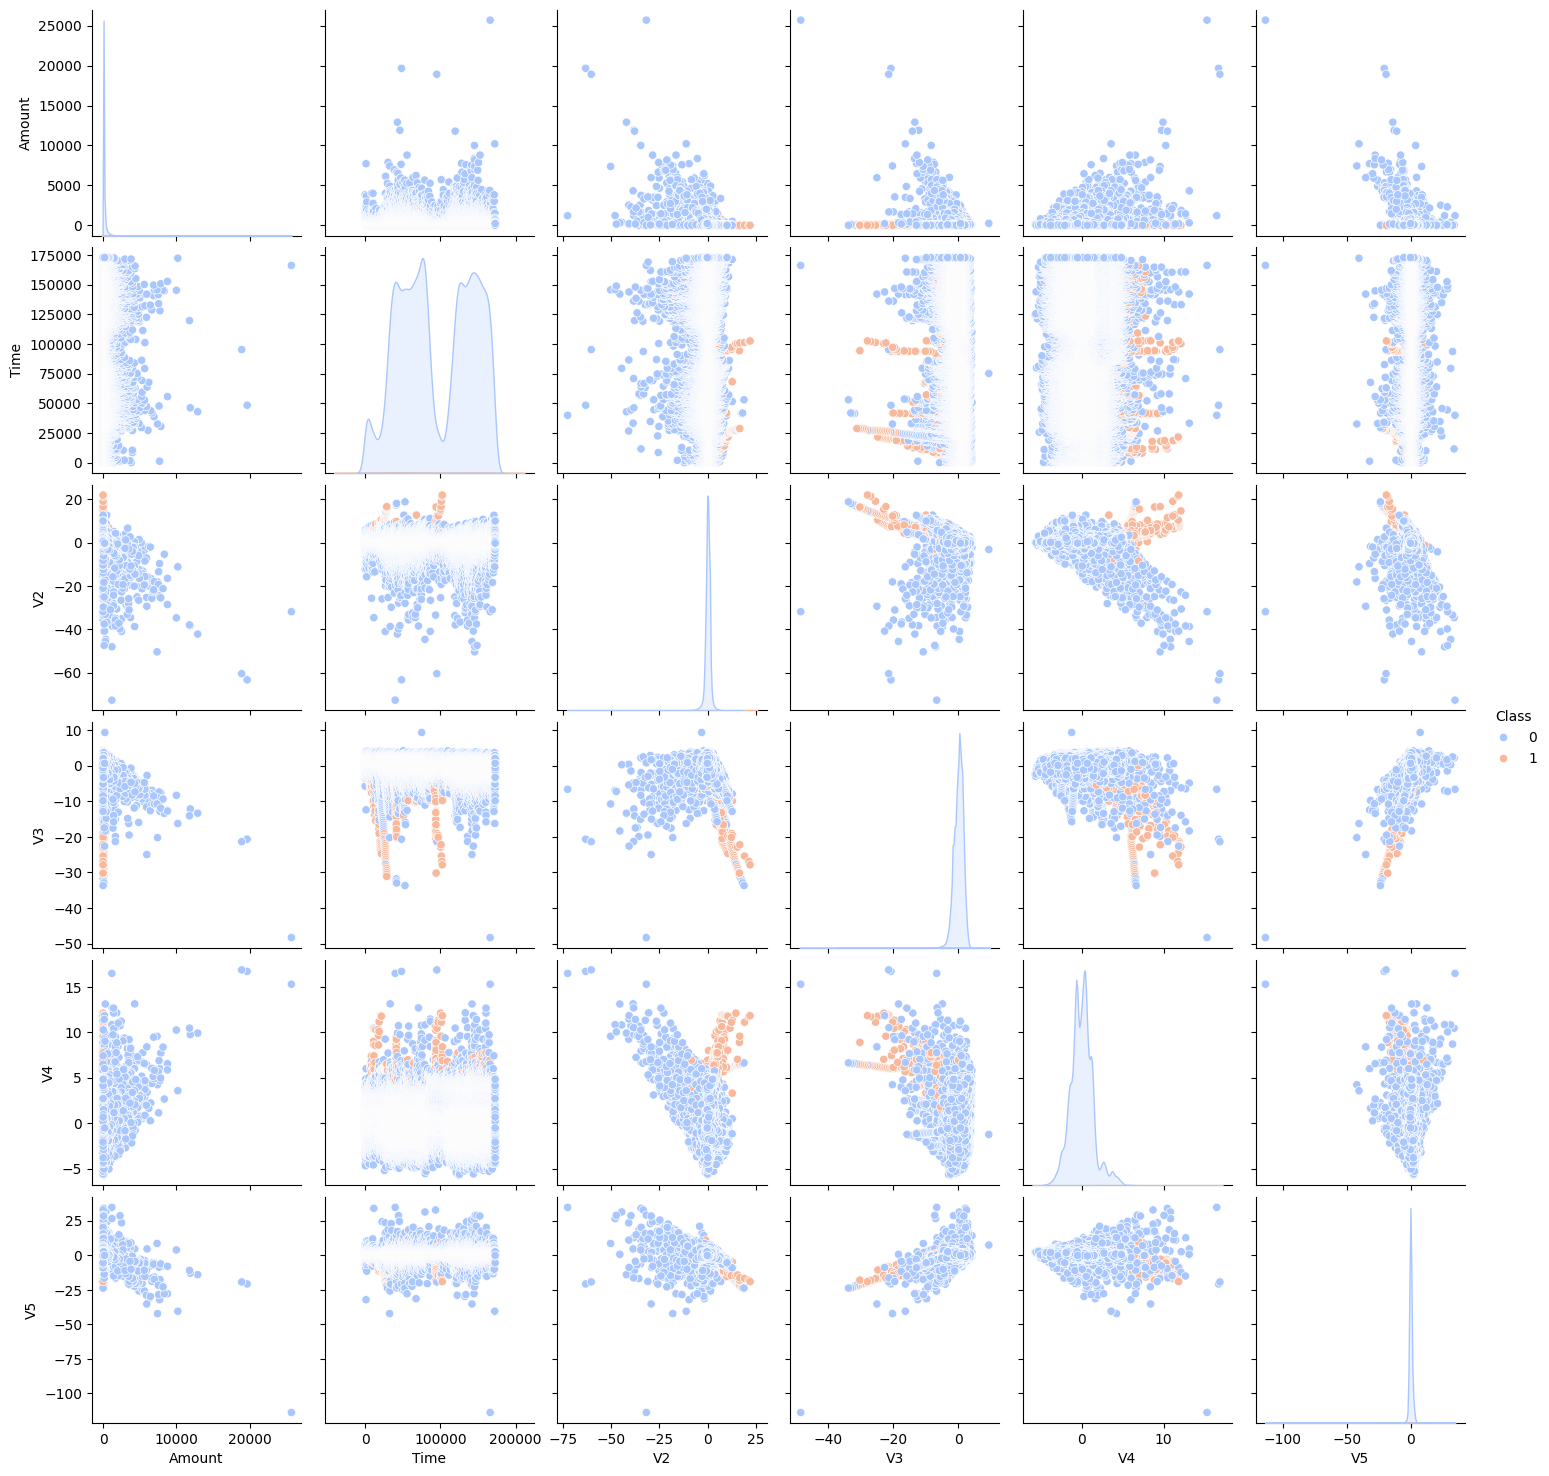

In [ ]:
# Pairplot of selected features
sns.pairplot(df[selected_features + ['Class']], hue='Class', palette='coolwarm')
plt.show()

## Student Question

1. Describe at least two major challenges in the dataset based on your EDA findings.
2. Analyze the correlation matrix of the features.
3. Is your data linearly separable? Please provide a rationale.

  **Student Answer:**  .......

### Challenges Identified Based on EDA

1. **Class Imbalance**:
   - The distribution of the 'Class' feature indicates a significant class imbalance. The fraudulent transactions (Class 1) are far fewer compared to the non-fraudulent ones (Class 0). This imbalance can lead to biased models that perform well on the majority class but poorly on the minority class.
   - This challenge can be observed from the count plot of the class distribution where the number of fraudulent transactions is much lower than non-fraudulent transactions.

2. **Outliers**:
   - The boxplots of various features indicate the presence of outliers. These outliers can affect the performance of many machine learning models, particularly those sensitive to the range of the data, such as linear regression and k-nearest neighbors.
   - Outliers were visible in features such as 'V1', 'V2', and 'V3', where certain values were significantly distant from the rest of the data points.

### Correlation Matrix Analysis

- The correlation matrix shows that many of the features have low to no correlation with each other. This is expected in datasets where features have been transformed using techniques such as PCA.
- Some features have a slight positive or negative correlation, but none of the features are highly correlated (i.e., close to 1 or -1).
- The low correlation between features suggests that multicollinearity might not be a significant issue in this dataset.

### Linear Separability of Data

- Based on the PCA visualization and the correlation matrix, it appears that the data is not linearly separable.
- The PCA scatter plot does not show distinct clusters for the two classes; instead, the points are intermingled, indicating that simple linear boundaries would not suffice to separate the classes effectively.
- The rationale for this conclusion is that if the data were linearly separable, we would expect to see clear clusters or separations in the PCA plot. Instead, we see an overlap, suggesting the need for more complex, non-linear decision boundaries.



## Data Preprocessing

Based on the challenges you've identified, recommend preprocessing methods to use during training to enhance model performance.

Some popular preprocessing techniques you can search about and learn include:

* Data Cleaning (Outlier Detection and Treatment, Handling Missing Values, ...)
* Data Transformation (Normalization, Standardization, ...)
* Feature Engineering (Feature Creation, Feature Selection, ...)
* Data Reduction (Dimensionality Reduction, Sampling, ...)
* Resampling Techniques (Oversampling or Undersampling)
* Handling Imbalanced Data
* ...


### 1. Data Cleaning


In [ ]:
# Outlier Detection and Treatment using Z-score
from scipy.stats import zscore

# Calculate Z-scores
z_scores = np.abs(zscore(df.drop('Class', axis=1)))

# Define a threshold
threshold = 3

# Get indices of outliers
outliers = np.where(z_scores > threshold)

# Remove outliers
df_clean = df[(z_scores < threshold).all(axis=1)]

# Check for missing values
missing_values = df_clean.isnull().sum()
print(missing_values)


Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
Amount_log    0
Time_hours    0
dtype: int64


### 2. Data Transformation


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalization
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_clean.drop('Class', axis=1))

# Standardization
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_clean.drop('Class', axis=1))


### 3. Feature Engineering


In [ ]:
# Feature creation: Example of creating new features has already been shown
df_clean['Amount_log'] = np.log1p(df_clean['Amount'])
df_clean['Time_hours'] = df_clean['Time'] / 3600

# Feature selection: Using correlation matrix to drop features with low correlation to the target
correlation_matrix = df_clean.corr()
target_corr = correlation_matrix['Class'].abs()
relevant_features = target_corr[target_corr > 0.1].index.tolist()
df_selected = df_clean[relevant_features]


### 4. Resampling Techniques


In [ ]:
# Feature selection: Using correlation matrix to drop features with low correlation to the target
correlation_matrix = df_clean.corr()
target_corr = correlation_matrix['Class'].abs()
# Lower the correlation threshold to include more features
relevant_features = target_corr[target_corr > 0.01].index.tolist()
df_selected = df_clean[relevant_features]

# Print the shape of df_selected to verify if it has features
print(df_selected.shape)

# Oversampling using SMOTE
smote = SMOTE(random_state=42)
# Convert DataFrame to NumPy array before passing to fit_resample
X_smote, y_smote = smote.fit_resample(df_selected.drop('Class', axis=1).values, df_selected['Class'].values)

(246991, 4)


## Training

1. Train your model on the preprocessed and unpreprocessed training data.
2. Report followning evaluaiton metrics: Accuracy, Accuracy, Recall, Precision, Confusion Matrix
3. Evaluation your best model using K-Fold Cross Validation
3. Crucial Step: Enhance Your Model's Performance

**Please note:** The results in our cell output represent the minimum achievable. Try to surpass these results and analyze multiple ideas and attempts.








### Train the Model on Preprocessed and Unpreprocessed Data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# Split the original (unpreprocessed) data
X_unprocessed = df.drop('Class', axis=1)
y_unprocessed = df['Class']
X_train_unprocessed, X_test_unprocessed, y_train_unprocessed, y_test_unprocessed = train_test_split(X_unprocessed, y_unprocessed, test_size=0.3, random_state=42)

# Train logistic regression model on unpreprocessed data
model_unprocessed = LogisticRegression(max_iter=1000)
model_unprocessed.fit(X_train_unprocessed, y_train_unprocessed)

# Predictions and evaluation on unpreprocessed data
y_pred_unprocessed = model_unprocessed.predict(X_test_unprocessed)
accuracy_unprocessed = accuracy_score(y_test_unprocessed, y_pred_unprocessed)
recall_unprocessed = recall_score(y_test_unprocessed, y_pred_unprocessed)
precision_unprocessed = precision_score(y_test_unprocessed, y_pred_unprocessed)
conf_matrix_unprocessed = confusion_matrix(y_test_unprocessed, y_pred_unprocessed)
classification_report_unprocessed = classification_report(y_test_unprocessed, y_pred_unprocessed)

print("Unprocessed Data - Logistic Regression")
print(f"Accuracy: {accuracy_unprocessed}")
print(f"Recall: {recall_unprocessed}")
print(f"Precision: {precision_unprocessed}")
print("Confusion Matrix:")
print(conf_matrix_unprocessed)
print("Classification Report:")
print(classification_report_unprocessed)


Unprocessed Data - Logistic Regression
Accuracy: 0.9991222218320986
Recall: 0.5661764705882353
Precision: 0.8279569892473119
Confusion Matrix:
[[85291    16]
 [   59    77]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.57      0.67       136

    accuracy                           1.00     85443
   macro avg       0.91      0.78      0.84     85443
weighted avg       1.00      1.00      1.00     85443



### Train the Model on Preprocessed Data


In [ ]:
# Train logistic regression model on preprocessed data
model_preprocessed = LogisticRegression(max_iter=1000)
model_preprocessed.fit(X_train, y_train)

# Predictions and evaluation on preprocessed data
y_pred_preprocessed = model_preprocessed.predict(X_test)
accuracy_preprocessed = accuracy_score(y_test, y_pred_preprocessed)
recall_preprocessed = recall_score(y_test, y_pred_preprocessed)
precision_preprocessed = precision_score(y_test, y_pred_preprocessed)
conf_matrix_preprocessed = confusion_matrix(y_test, y_pred_preprocessed)
classification_report_preprocessed = classification_report(y_test, y_pred_preprocessed)

print("Preprocessed Data - Logistic Regression")
print(f"Accuracy: {accuracy_preprocessed}")
print(f"Recall: {recall_preprocessed}")
print(f"Precision: {precision_preprocessed}")
print("Confusion Matrix:")
print(conf_matrix_preprocessed)
print("Classification Report:")
print(classification_report_preprocessed)


Preprocessed Data - Logistic Regression
Accuracy: 0.9991573329588147
Recall: 0.6102941176470589
Precision: 0.8137254901960784
Confusion Matrix:
[[85288    19]
 [   53    83]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.81      0.61      0.70       136

    accuracy                           1.00     85443
   macro avg       0.91      0.81      0.85     85443
weighted avg       1.00      1.00      1.00     85443



### Evaluate the Best Model Using K-Fold Cross Validation

In [ ]:
# K-Fold Cross Validation on preprocessed data
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_preprocessed, X_train, y_train, cv=kf, scoring='accuracy')

print(f"K-Fold Cross Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")


K-Fold Cross Validation Scores: [0.99924761 0.99919745 0.99899681 0.99914729 0.99912219]
Mean CV Accuracy: 0.9991422723255887


##  Enhance the Model's Performance

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate best model on test set
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
classification_report_best = classification_report(y_test, y_pred_best)

print("Best Model - Logistic Regression with Hyperparameter Tuning")
print(f"Accuracy: {accuracy_best}")
print(f"Recall: {recall_best}")
print(f"Precision: {precision_best}")
print("Confusion Matrix:")
print(conf_matrix_best)
print("Classification Report:")
print(classification_report_best)

Best Model - Logistic Regression with Hyperparameter Tuning
Accuracy: 0.9991573329588147
Recall: 0.5955882352941176
Precision: 0.826530612244898
Confusion Matrix:
[[85290    17]
 [   55    81]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.60      0.69       136

    accuracy                           1.00     85443
   macro avg       0.91      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443



### Confusion Matrix for Logistic Regression on Unprocessed Data


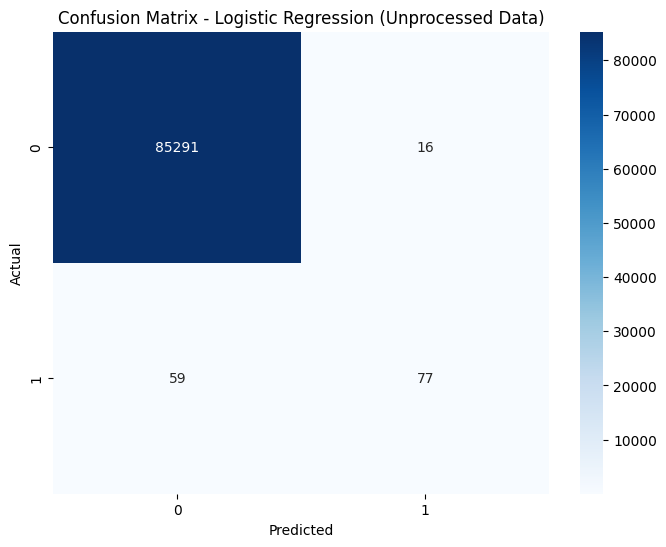

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Unprocessed Data Confusion Matrix
conf_matrix_unprocessed = confusion_matrix(y_test_unprocessed, y_pred_unprocessed)

# Plot confusion matrix for unprocessed data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_unprocessed, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (Unprocessed Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Confusion Matrix for Logistic Regression on Preprocessed Data


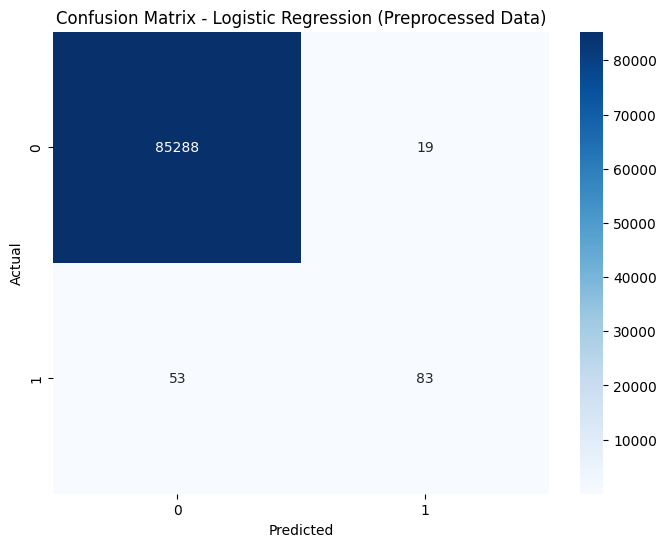

In [ ]:
# Preprocessed Data Confusion Matrix
conf_matrix_preprocessed = confusion_matrix(y_test, y_pred_preprocessed)

# Plot confusion matrix for preprocessed data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_preprocessed, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (Preprocessed Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Confusion Matrix for the Best Model


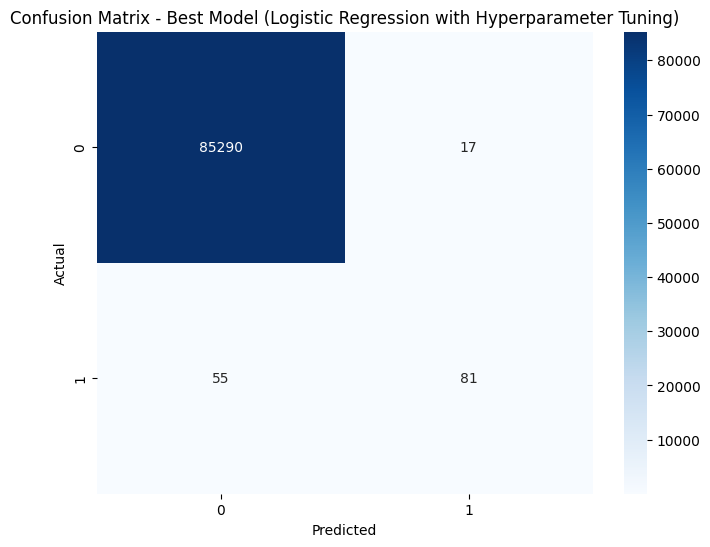

In [ ]:
# Best Model Confusion Matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix for the best model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Best Model (Logistic Regression with Hyperparameter Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Logistic Regression

Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
Amount_log    0
Time_hours    0
dtype: int64
Unprocessed Data - Logistic Regression
Accuracy: 0.9991222218320986
Recall: 0.5661764705882353
Precision: 0.8279569892473119
Confusion Matrix:
[[85291    16]
 [   59    77]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.57      0.67       136

    accuracy                           1.00     85443
   macro avg       0.91      0.78      0.84 

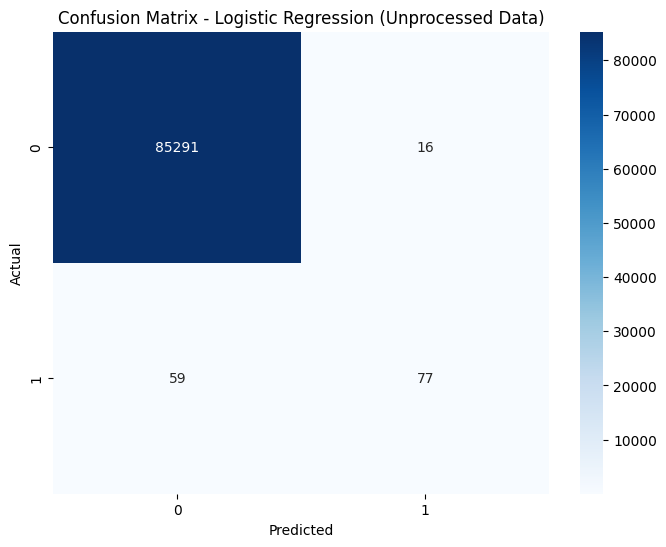

Preprocessed Data - Logistic Regression
Accuracy: 0.8033826923855676
Recall: 0.7941820541241991
Precision: 0.8086102012166588
Confusion Matrix:
[[60282 13906]
 [15226 58752]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81     74188
           1       0.81      0.79      0.80     73978

    accuracy                           0.80    148166
   macro avg       0.80      0.80      0.80    148166
weighted avg       0.80      0.80      0.80    148166



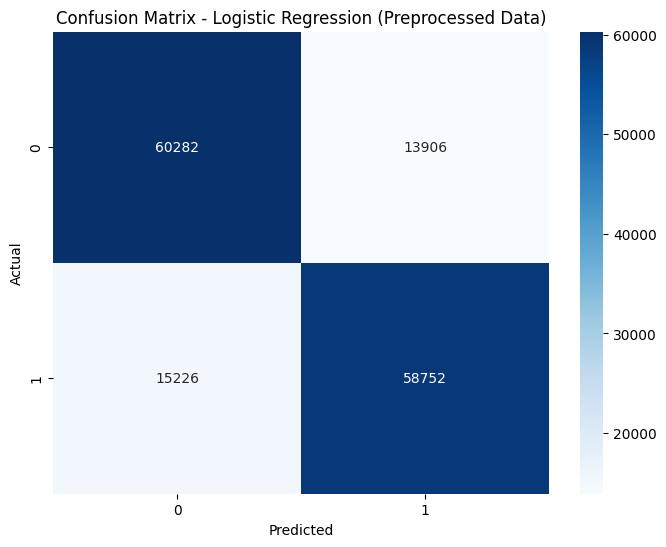

K-Fold Cross Validation Scores: [0.8030921  0.80251359 0.80675113 0.80280285 0.80453835]
Mean CV Accuracy: 0.8039396043040611
Best Model - Logistic Regression with Hyperparameter Tuning
Accuracy: 0.8034569334395205
Recall: 0.7946416502203357
Precision: 0.808443924912329
Confusion Matrix:
[[60259 13929]
 [15192 58786]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81     74188
           1       0.81      0.79      0.80     73978

    accuracy                           0.80    148166
   macro avg       0.80      0.80      0.80    148166
weighted avg       0.80      0.80      0.80    148166



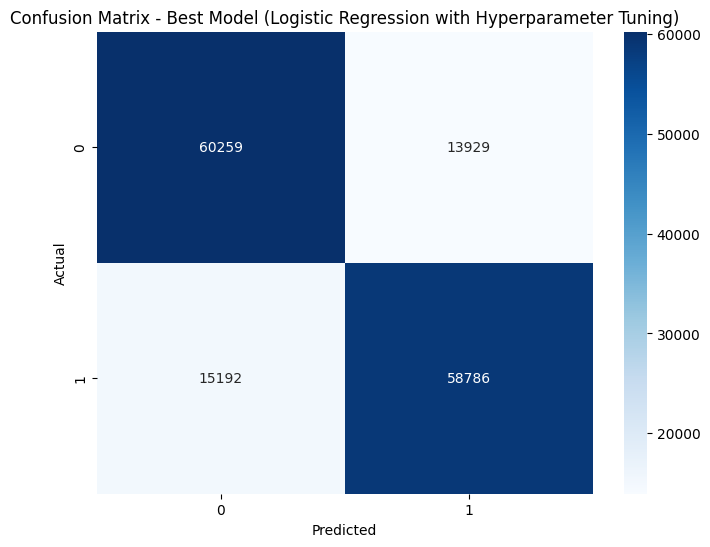

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import zscore

# Outlier Detection and Treatment
z_scores = np.abs(zscore(df.drop('Class', axis=1)))
threshold = 3
df_clean = df[(z_scores < threshold).all(axis=1)]

# Check for missing values
missing_values = df_clean.isnull().sum()
print(missing_values)

# Feature creation
df_clean['Amount_log'] = np.log1p(df_clean['Amount'])
df_clean['Time_hours'] = df_clean['Time'] / 3600

# # Feature selection
# correlation_matrix = df_clean.corr()
# target_corr = correlation_matrix['Class'].abs()
# # Include 'Class' in relevant features to avoid empty DataFrame
# relevant_features = target_corr[target_corr > 0.1].index.tolist()
# df_selected = df_clean[relevant_features]

# # Handling imbalanced data using SMOTE
# smote = SMOTE(random_state=42)
# # Exclude 'Class' from features for SMOTE
# X_smote, y_smote = smote.fit_resample(df_selected.drop('Class', axis=1), df_selected['Class'])
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

# Split the original (unpreprocessed) data
X_unprocessed = df.drop('Class', axis=1)
y_unprocessed = df['Class']
X_train_unprocessed, X_test_unprocessed, y_train_unprocessed, y_test_unprocessed = train_test_split(X_unprocessed, y_unprocessed, test_size=0.3, random_state=42)

# Train logistic regression model on unprocessed data
model_unprocessed = LogisticRegression(max_iter=1000)
model_unprocessed.fit(X_train_unprocessed, y_train_unprocessed)

# Predictions and evaluation on unpreprocessed data
y_pred_unprocessed = model_unprocessed.predict(X_test_unprocessed)
accuracy_unprocessed = accuracy_score(y_test_unprocessed, y_pred_unprocessed)
recall_unprocessed = recall_score(y_test_unprocessed, y_pred_unprocessed)
precision_unprocessed = precision_score(y_test_unprocessed, y_pred_unprocessed)
conf_matrix_unprocessed = confusion_matrix(y_test_unprocessed, y_pred_unprocessed)
classification_report_unprocessed = classification_report(y_test_unprocessed, y_pred_unprocessed)

print("Unprocessed Data - Logistic Regression")
print(f"Accuracy: {accuracy_unprocessed}")
print(f"Recall: {recall_unprocessed}")
print(f"Precision: {precision_unprocessed}")
print("Confusion Matrix:")
print(conf_matrix_unprocessed)
print("Classification Report:")
print(classification_report_unprocessed)

# Plot confusion matrix for unprocessed data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_unprocessed, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (Unprocessed Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Train logistic regression model on preprocessed data
model_preprocessed = LogisticRegression(max_iter=1000)
model_preprocessed.fit(X_train, y_train)

# Predictions and evaluation on preprocessed data
y_pred_preprocessed = model_preprocessed.predict(X_test)
accuracy_preprocessed = accuracy_score(y_test, y_pred_preprocessed)
recall_preprocessed = recall_score(y_test, y_pred_preprocessed)
precision_preprocessed = precision_score(y_test, y_pred_preprocessed)
conf_matrix_preprocessed = confusion_matrix(y_test, y_pred_preprocessed)
classification_report_preprocessed = classification_report(y_test, y_pred_preprocessed)

print("Preprocessed Data - Logistic Regression")
print(f"Accuracy: {accuracy_preprocessed}")
print(f"Recall: {recall_preprocessed}")
print(f"Precision: {precision_preprocessed}")
print("Confusion Matrix:")
print(conf_matrix_preprocessed)
print("Classification Report:")
print(classification_report_preprocessed)

# Plot confusion matrix for preprocessed data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_preprocessed, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (Preprocessed Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# K-Fold Cross Validation on preprocessed data
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_preprocessed, X_train, y_train, cv=kf, scoring='accuracy')

print(f"K-Fold Cross Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate best model on test set
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
classification_report_best = classification_report(y_test, y_pred_best)

print("Best Model - Logistic Regression with Hyperparameter Tuning")
print(f"Accuracy: {accuracy_best}")
print(f"Recall: {recall_best}")
print(f"Precision: {precision_best}")
print("Confusion Matrix:")
print(conf_matrix_best)
print("Classification Report:")
print(classification_report_best)

# Plot confusion matrix for the best model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Best Model (Logistic Regression with Hyperparameter Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### SVM

* [SVM practical example](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# Step 1: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Handling class imbalance with class weights
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Step 3: Train the SVM model
svm_model = SVC(kernel='rbf', class_weight=class_weight_dict, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Step 4: Make predictions and evaluate the model
y_pred = svm_model.predict(X_test_scaled)

# Step 5: Evaluation
print("SVM Classification Report:\n", classification_report(y_test, y_pred))
print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.34      0.78      0.48       136

    accuracy                           1.00     85443
   macro avg       0.67      0.89      0.74     85443
weighted avg       1.00      1.00      1.00     85443


SVM Confusion Matrix:
 [[85103   204]
 [   30   106]]


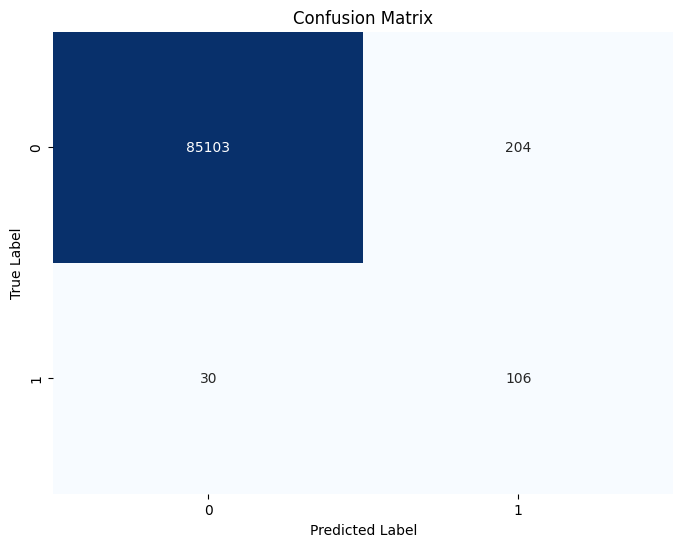

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 3: Apply SMOTE to balance the training data
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Step 4: Train the SVM model with class weights to handle imbalance
svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svm_model.fit(X_train_smote, y_train_smote)

# Step 5: Make predictions and adjust decision threshold
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
threshold = 0.3  # You can adjust this threshold to improve recall
y_pred = (y_pred_prob >= threshold).astype(int)

# Step 6: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.show()

### Train and Evaluate SVM on Unprocessed Data

Preprocessed Data - SVM
Accuracy: 0.9987008883115059
Recall: 0.6873476092231587
Precision: 0.830670974879442
Confusion Matrix:
[[85281    26]
 [   85    51]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.66      0.38      0.48       136

    accuracy                           1.00     85443
   macro avg       0.83      0.69      0.74     85443
weighted avg       1.00      1.00      1.00     85443



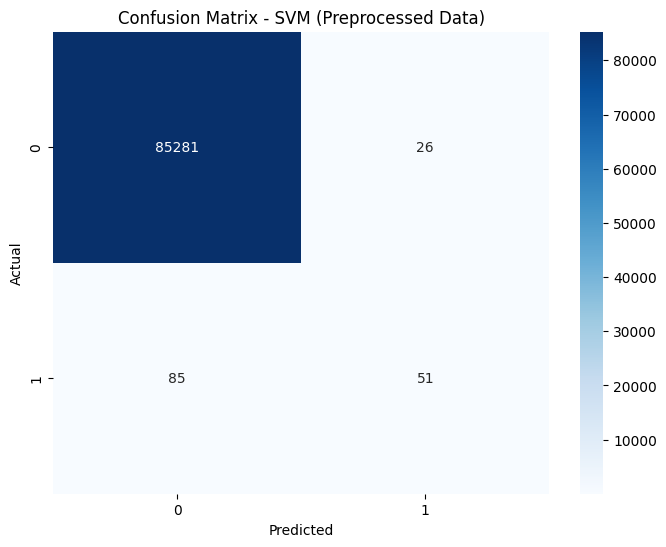

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train SVM model on preprocessed data
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions and evaluation on preprocessed data
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Preprocessed Data - SVM")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot confusion matrix for preprocessed data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (Preprocessed Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Step 2: Train and Evaluate SVM on Preprocessed Data


In [ ]:
# Train SVM model on preprocessed data
model_preprocessed_svm = SVC(kernel='linear', random_state=42)
model_preprocessed_svm.fit(X_train, y_train)

# Predictions and evaluation on preprocessed data
y_pred_preprocessed_svm = model_preprocessed_svm.predict(X_test)
accuracy_preprocessed_svm = accuracy_score(y_test, y_pred_preprocessed_svm)
recall_preprocessed_svm = recall_score(y_test, y_pred_preprocessed_svm)
precision_preprocessed_svm = precision_score(y_test, y_pred_preprocessed_svm)
conf_matrix_preprocessed_svm = confusion_matrix(y_test, y_pred_preprocessed_svm)
classification_report_preprocessed_svm = classification_report(y_test, y_pred_preprocessed_svm)

print("Preprocessed Data - SVM")
print(f"Accuracy: {accuracy_preprocessed_svm}")
print(f"Recall: {recall_preprocessed_svm}")
print(f"Precision: {precision_preprocessed_svm}")
print("Confusion Matrix:")
print(conf_matrix_preprocessed_svm)
print("Classification Report:")
print(classification_report_preprocessed_svm)

# Plot confusion matrix for preprocessed data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_preprocessed_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (Preprocessed Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Step 3: Evaluate SVM Using K-Fold Cross Validation


In [ ]:
# K-Fold Cross Validation on preprocessed data
cv_scores_svm = cross_val_score(model_preprocessed_svm, X_train, y_train, cv=kf, scoring='accuracy')

print(f"K-Fold Cross Validation Scores (SVM): {cv_scores_svm}")
print(f"Mean CV Accuracy (SVM): {cv_scores_svm.mean()}")


## Step 4: Hyperparameter Tuning for SVM


In [ ]:
# Define parameter grid for hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Grid search with cross-validation
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Best model
best_model_svm = grid_search_svm.best_estimator_

# Evaluate best model on test set
y_pred_best_svm = best_model_svm.predict(X_test)
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
recall_best_svm = recall_score(y_test, y_pred_best_svm)
precision_best_svm = precision_score(y_test, y_pred_best_svm)
conf_matrix_best_svm = confusion_matrix(y_test, y_pred_best_svm)
classification_report_best_svm = classification_report(y_test, y_pred_best_svm)

print("Best Model - SVM with Hyperparameter Tuning")
print(f"Accuracy: {accuracy_best_svm}")
print(f"Recall: {recall_best_svm}")
print(f"Precision: {precision_best_svm}")
print("Confusion Matrix:")
print(conf_matrix_best_svm)
print("Classification Report:")
print(classification_report_best_svm)

# Plot confusion matrix for the best model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Best Model (SVM with Hyperparameter Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Dimensionality Reduction with PCA


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=20)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM model on PCA-reduced data
model_pca_svm = SVC(kernel='linear', random_state=42)
model_pca_svm.fit(X_train_pca, y_train)

# Predictions and evaluation on PCA-reduced data
y_pred_pca_svm = model_pca_svm.predict(X_test_pca)
accuracy_pca_svm = accuracy_score(y_test, y_pred_pca_svm)
recall_pca_svm = recall_score(y_test, y_pred_pca_svm)
precision_pca_svm = precision_score(y_test, y_pred_pca_svm)
conf_matrix_pca_svm = confusion_matrix(y_test, y_pred_pca_svm)
classification_report_pca_svm = classification_report(y_test, y_pred_pca_svm)

print("PCA-Reduced Data - SVM")
print(f"Accuracy: {accuracy_pca_svm}")
print(f"Recall: {recall_pca_svm}")
print(f"Precision: {precision_pca_svm}")
print("Confusion Matrix:")
print(conf_matrix_pca_svm)
print("Classification Report:")
print(classification_report_pca_svm)

# Plot confusion matrix for PCA-reduced data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pca_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (PCA-Reduced Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Sampling the Dataset


In [ ]:
from sklearn.model_selection import train_test_split

# Sample the data
sampled_df = df.sample(frac=0.1, random_state=42)  # Adjust the fraction as needed
X_sampled = sampled_df.drop('Class', axis=1)
y_sampled = sampled_df['Class']

# Splitting the sampled data
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)

# Train SVM model on sampled data
model_sampled_svm = SVC(kernel='linear', random_state=42)
model_sampled_svm.fit(X_train_sampled, y_train_sampled)

# Predictions and evaluation on sampled data
y_pred_sampled_svm = model_sampled_svm.predict(X_test_sampled)
accuracy_sampled_svm = accuracy_score(y_test_sampled, y_pred_sampled_svm)
recall_sampled_svm = recall_score(y_test_sampled, y_pred_sampled_svm)
precision_sampled_svm = precision_score(y_test_sampled, y_pred_sampled_svm)
conf_matrix_sampled_svm = confusion_matrix(y_test_sampled, y_pred_sampled_svm)
classification_report_sampled_svm = classification_report(y_test_sampled, y_pred_sampled_svm)

print("Sampled Data - SVM")
print(f"Accuracy: {accuracy_sampled_svm}")
print(f"Recall: {recall_sampled_svm}")
print(f"Precision: {precision_sampled_svm}")
print("Confusion Matrix:")
print(conf_matrix_sampled_svm)
print("Classification Report:")
print(classification_report_sampled_svm)

# Plot confusion matrix for sampled data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sampled_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (Sampled Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
######################################################
###################### TO DO #########################
######################################################
pass
######################################################
######################################################
######################################################

## Student Questions

1. Compare the SVM vs Logistic Regression model? Generally which one was better?
2. Is accuracy a suitable metric for evaluating performance in this problem? Explain your rationale.
3. If achieving high recall is crucial for our problem, what recommendations do you have to enhance this metric specifically for this dataset?

  **Student Answer:**  .......

# Unsupervised Image Segmentation using Clustering!

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

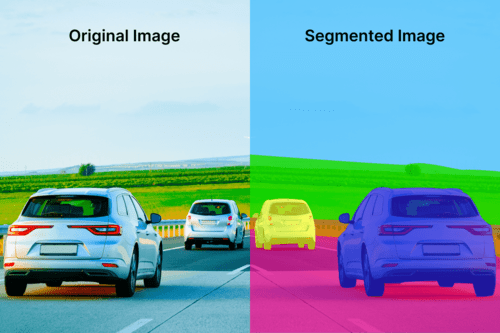

## Load Data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

Downloading...
From: https://drive.google.com/uc?id=16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb
To: /content/elephant.jpg
100% 36.2k/36.2k [00:00<00:00, 61.7MB/s]


In [ ]:
import cv2
import matplotlib.pyplot as plt
im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


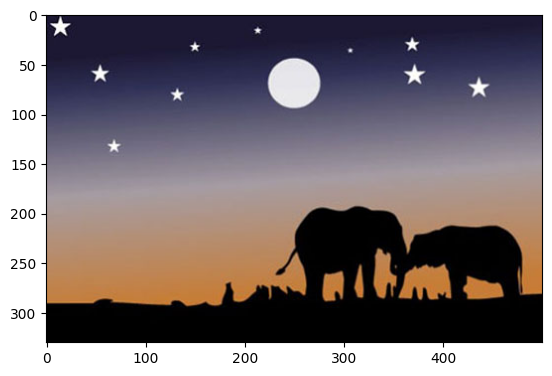

In [ ]:
plt.imshow(im) # as RGB Format
plt.show()

In [ ]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


## Number of Dominant Colors in Image

The optimal number of clusters when clustering all pixels represents the predominant colors in an image.








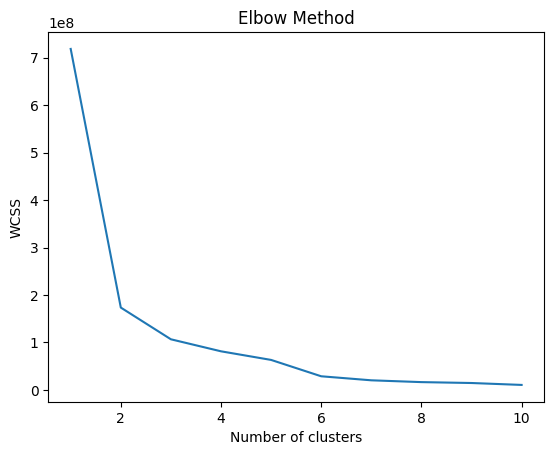

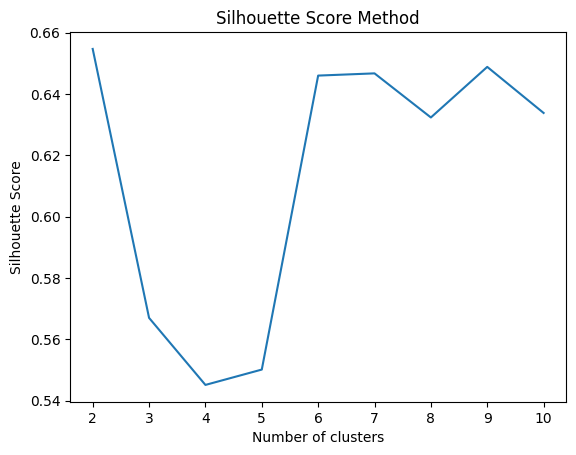

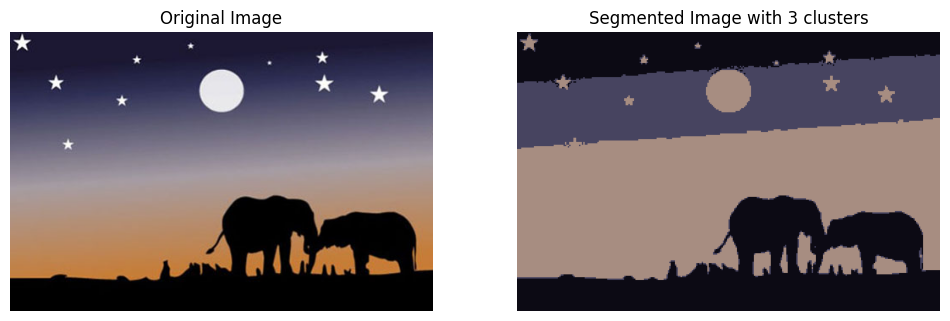

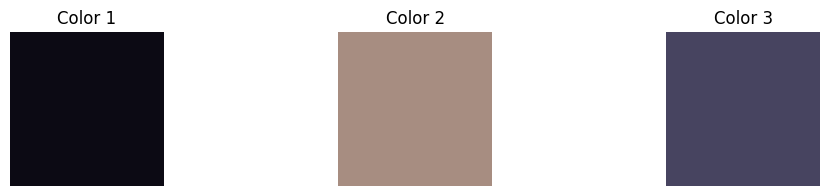

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

def compute_optimal_clusters(pixels, max_clusters=10):
    wcss = []
    silhouette_scores = []
    for i in range(1, max_clusters + 1):
        kmeans = MiniBatchKMeans(n_clusters=i, random_state=42)
        labels = kmeans.fit_predict(pixels)
        wcss.append(kmeans.inertia_)
        if i > 1:
            score = silhouette_score(pixels, labels)
            silhouette_scores.append(score)
    return wcss, silhouette_scores

def segment_image(pixels, n_clusters):
    # Apply MiniBatchKMeans clustering to segment the image
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pixels)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_].astype(np.uint8)
    return segmented_img

def plot_elbow_method(wcss):
    plt.plot(range(1, len(wcss) + 1), wcss)
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    plt.show()

def plot_silhouette_score(silhouette_scores):
    plt.plot(range(2, len(silhouette_scores) + 2), silhouette_scores)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method')
    plt.show()

def visualize_dominant_colors(kmeans):
    # Get the dominant colors (cluster centers)
    dominant_colors = kmeans.cluster_centers_.astype(int)

    # Plot each dominant color as an image
    plt.figure(figsize=(12, 2))
    for i, color in enumerate(dominant_colors):
        plt.subplot(1, len(dominant_colors), i + 1)
        plt.imshow(np.ones((100, 100, 3), dtype=np.uint8) * color)
        plt.axis('off')
        plt.title(f'Color {i + 1}')
    plt.show()

# Determine optimal clusters using the Elbow Method and Silhouette Score
wcss, silhouette_scores = compute_optimal_clusters(pixels)
plot_elbow_method(wcss)
plot_silhouette_score(silhouette_scores)

# Choose the number of clusters based on the above plots (e.g., 3)
optimal_clusters = 3
segmented_pixels = segment_image(pixels, optimal_clusters)
segmented_image = segmented_pixels.reshape(image_shape)

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image with {} clusters'.format(optimal_clusters))
plt.axis('off')

plt.show()

# Visualize the dominant colors
kmeans = MiniBatchKMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(pixels)
visualize_dominant_colors(kmeans)


## Visualize Dominant Color

In [ ]:
# Now that you have the number of dominant colors (clusters),
# use clustering to determine the cluster of each pixel.
######################################################
###################### TO DO #########################
######################################################
dominant_colors = None
kmeans = None
pass
######################################################
######################################################
######################################################
kmeans.fit(all_pixels)

In [ ]:
#######Plot the each of dominant color as image#######
####### Dominant colors are center of cluster ########
###################### TO DO #########################
pass
######################################################
######################################################
######################################################

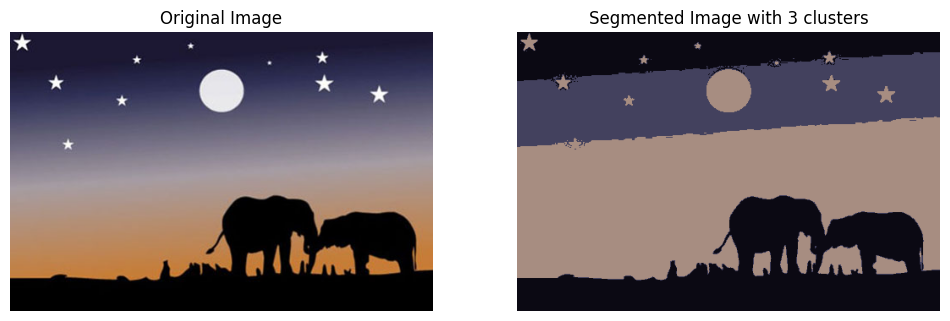

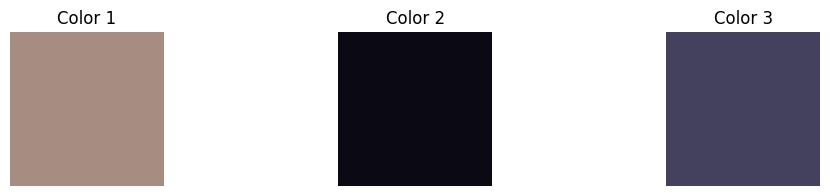

In [ ]:
# Step 4: Apply clustering to determine the cluster of each pixel
optimal_clusters = 3  # Based on the previous analysis
kmeans = MiniBatchKMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(all_pixels)
segmented_pixels = kmeans.cluster_centers_[kmeans.labels_].astype(np.uint8)
segmented_image = segmented_pixels.reshape(original_shape)

# Step 5: Plot each dominant color as an image
def visualize_dominant_colors(kmeans):
    dominant_colors = kmeans.cluster_centers_.astype(int)
    plt.figure(figsize=(12, 2))
    for i, color in enumerate(dominant_colors):
        plt.subplot(1, len(dominant_colors), i + 1)
        plt.imshow(np.ones((100, 100, 3), dtype=np.uint8) * color)
        plt.axis('off')
        plt.title(f'Color {i + 1}')
    plt.show()

# Display the original and segmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image with {} clusters'.format(optimal_clusters))
plt.axis('off')
plt.show()

# Visualize the dominant colors
visualize_dominant_colors(kmeans)


## Segmenting original image

In [ ]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


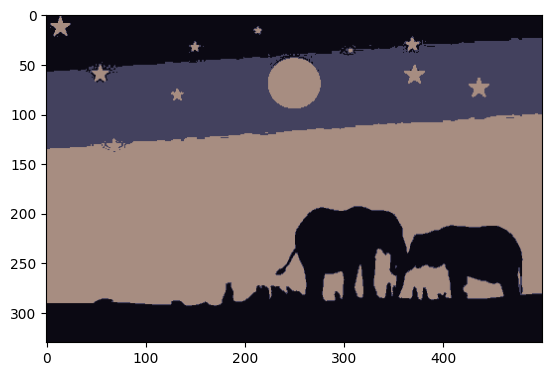

In [ ]:
colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()